# Ensemble Project - Term Deposit Sale (Ver-2)
## Submitted By: Bikram M.Baruah

***

## Problem Statement : Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values
(mean and median), standard deviation and quartiles, analysis of the body of
distributions / tails, missing values, outliers.

b. Strategies to address the different data challenges such as data pollution, outlier’s
treatment and missing values treatment.

c. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots.

2. Multivariate analysis (8 marks)

a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any.
Visualize the analysis using boxplots and pair plots, histograms or density curves.
Select the most appropriate attributes.

b. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots

***

## Deliverable - 1

In [1]:
#import basic libraries
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data
df = pd.read_csv("bank-full.csv")

### 1a. Univariate analysis 

In [3]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.tail(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45192,29,management,single,tertiary,no,765,no,no,cellular,16,nov,238,1,-1,0,unknown,yes
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,-1,0,unknown,yes
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"45,211.0000",40.9362,10.6188,18.0000,33.0000,39.0000,48.0000,95.0000
balance,"45,211.0000","1,362.2721","3,044.7658","-8,019.0000",72.0000,448.0000,"1,428.0000","102,127.0000"
day,"45,211.0000",15.8064,8.3225,1.0000,8.0000,16.0000,21.0000,31.0000
duration,"45,211.0000",258.1631,257.5278,0.0000,103.0000,180.0000,319.0000,"4,918.0000"
campaign,"45,211.0000",2.7638,3.0980,1.0000,1.0000,2.0000,3.0000,63.0000
pdays,"45,211.0000",40.1978,100.1287,-1.0000,-1.0000,-1.0000,-1.0000,871.0000
previous,"45,211.0000",0.5803,2.3034,0.0000,0.0000,0.0000,0.0000,275.0000


In [6]:
df.shape

(45211, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
def listoutvalues():
    for i in list(df.columns[df.dtypes=='object']):   # checking value counts of all object type columns
        print("COLUMN: ",i)
        print(df[i].value_counts())
        print("-"*30)
        print()
listoutvalues()

COLUMN:  job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------------------------

COLUMN:  marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------

COLUMN:  education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------------

COLUMN:  default
no     44396
yes      815
Name: default, dtype: int64
------------------------------

COLUMN:  housing
yes    25130
no     20081
Name: housing, dtype: int64
------------------------------

COLUMN:  loan
no     37967
yes     7244
Name: loan, dtype: int64
------------------------------

COLUMN:  contact
cellular     29285
unknown      13020
telephone     2906
Na

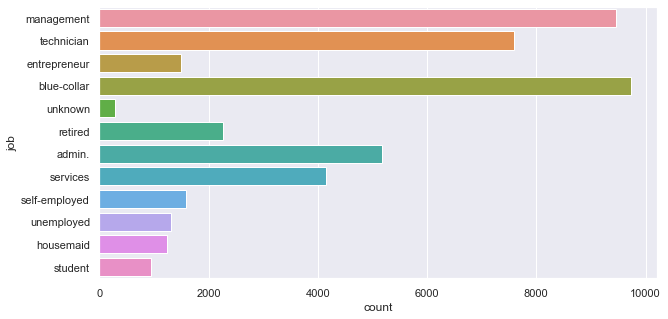

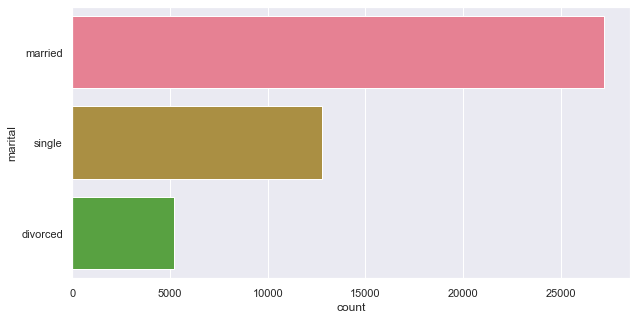

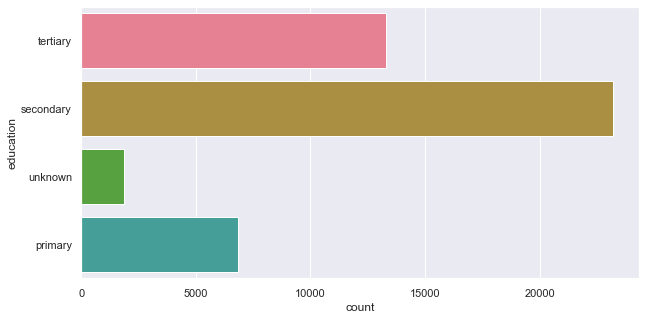

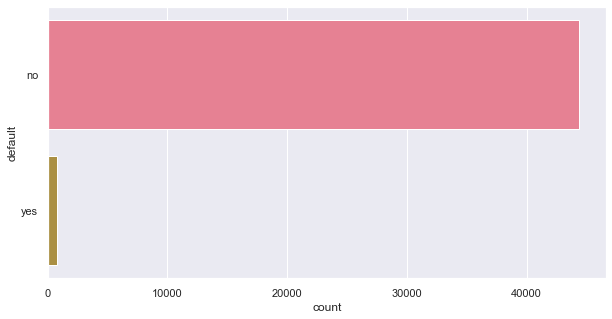

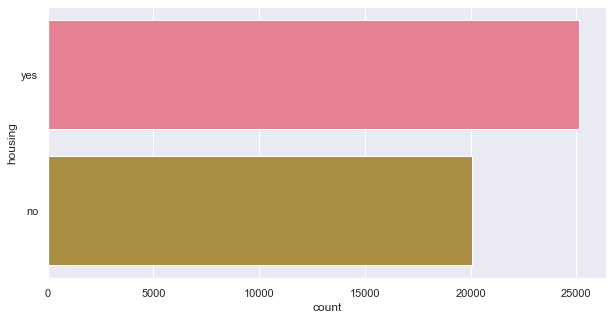

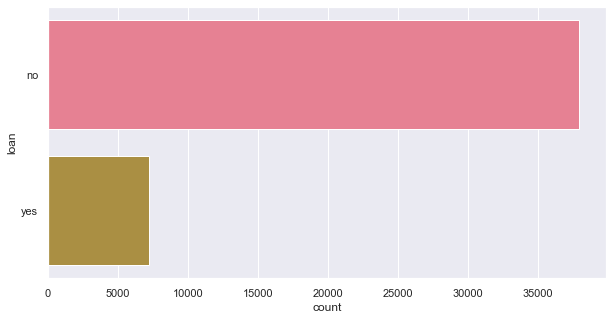

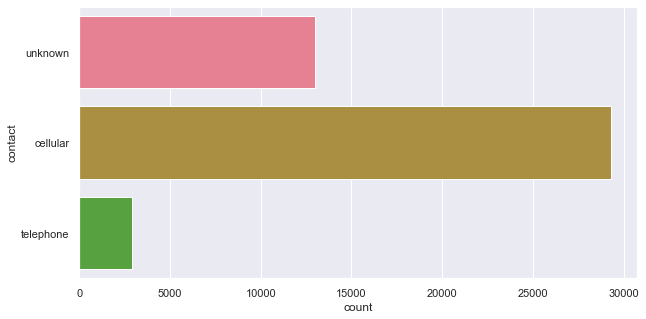

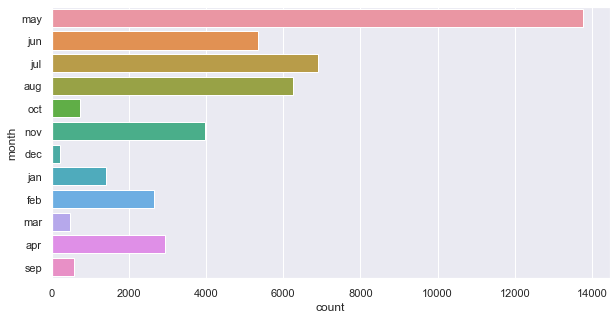

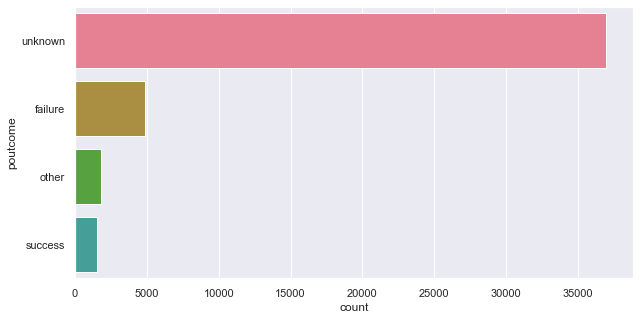

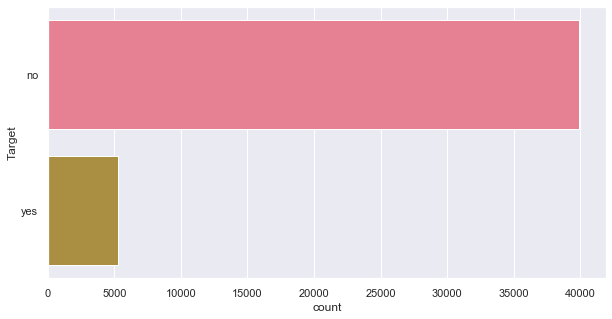

In [9]:
for i in list(df.columns[df.dtypes=='object']):   # checking value counts of all object type columns
    plt.figure(figsize=(10,5))
    sns.countplot(y=df[i])
    plt.show()

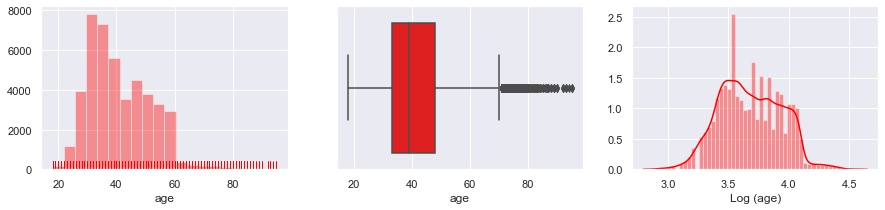

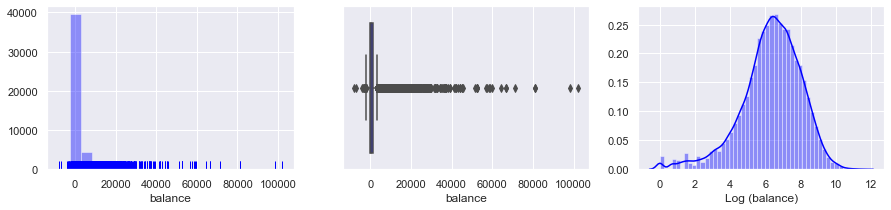

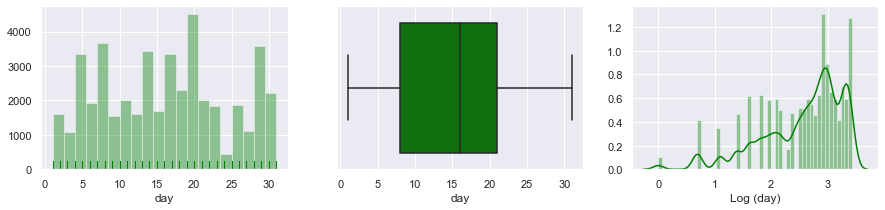

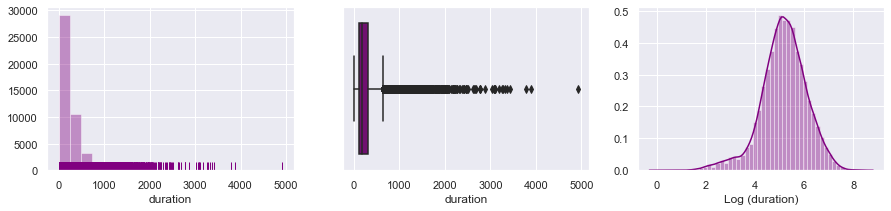

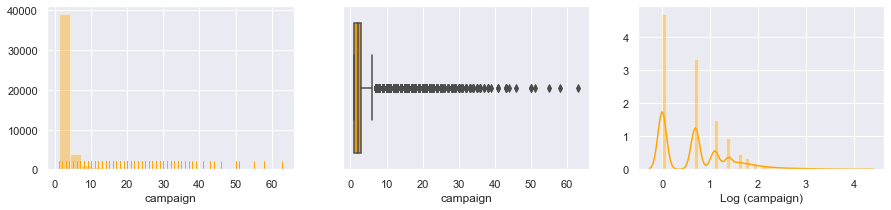

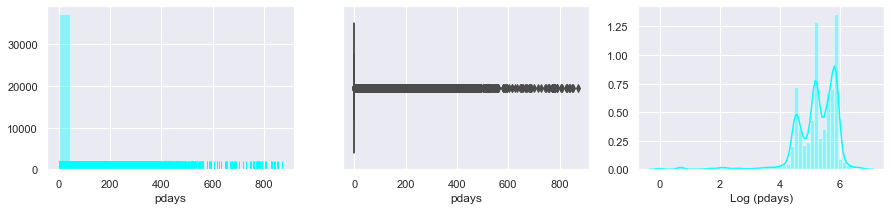

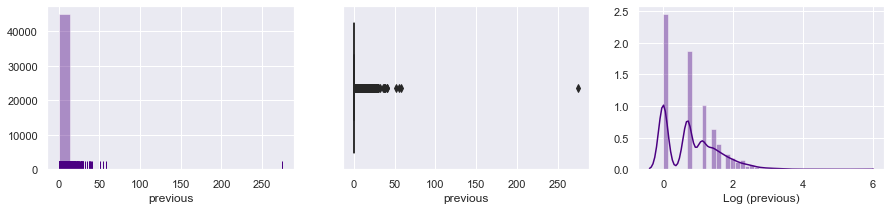

In [10]:
#noneg = lambda x: 900 if -1 else x
#df.pdays = df.pdays.apply(noneg)

colors = ['red','blue','green','purple','orange','cyan','indigo']
def plotua(series, hue, color):
    plt.figure(figsize=(15,3))
    plt.subplot(1,3,1)
    sns.distplot(series, color=color, kde=False, bins=20, rug=True)
    
    plt.subplot(1,3,2)
    sns.boxplot(series, color=color)
 
    plt.subplot(1,3,3)    
    sns.distplot(np.log(series[series>0]), color=color, axlabel="Log ("+series.name+")")
    
    plt.show()

for i, c in enumerate(df.columns[df.dtypes=='int64']):   # checking value counts of all object type columns
    plotua(df[c],df.Target, colors[i])



**Observations:**

* From the attribute descriptions, it can be concluded that data are from a Customer Relation Management System, where the bank's customer executives makes multiple contacts to prospective clients in various means and duration. All these data are carefully recorded and reported.

* Among the categorical features 'unknown' apprears very frequently. This can be considered as missing value. However, the number of such values too large compared to total no. of data points.

* Most of the continuous features like age, balance, duration, campaign, pdays, previous has lots of values outside the IQR range. 'Rug' option of distplot is used to better understand the distribution. A plot of Log of the values is also used.

* Two features - pdays and previous have very few valid data (non-zero real data points). Majority of the data are zero. The 'box' in the box plots has collapsed into a single line at zero. KDE could not be generated for these features.

* The proportion of "no" to "yes" in the Target variable is 39922:5289 ~ 7.55:1.00. The data are highly biased.

**Strategies:**
* The percentage of 'unknown' values are too large to drop. If a single value like mean, median are used, there is a risk of data becoming biased. The strategy adopted is to replace with the same proportion of the other data points.

* For pdays, -1 tells us the person has not been contacted or contactperiod is beyond 900 days. So, -1 will be replaced with 900 so that it remains consistent with length of time the person has been contacted.


## 2. Multivariate analysis

All analysis has been done with respect to the 'Target' variable i.e. "if the client subscribed a term deposit".

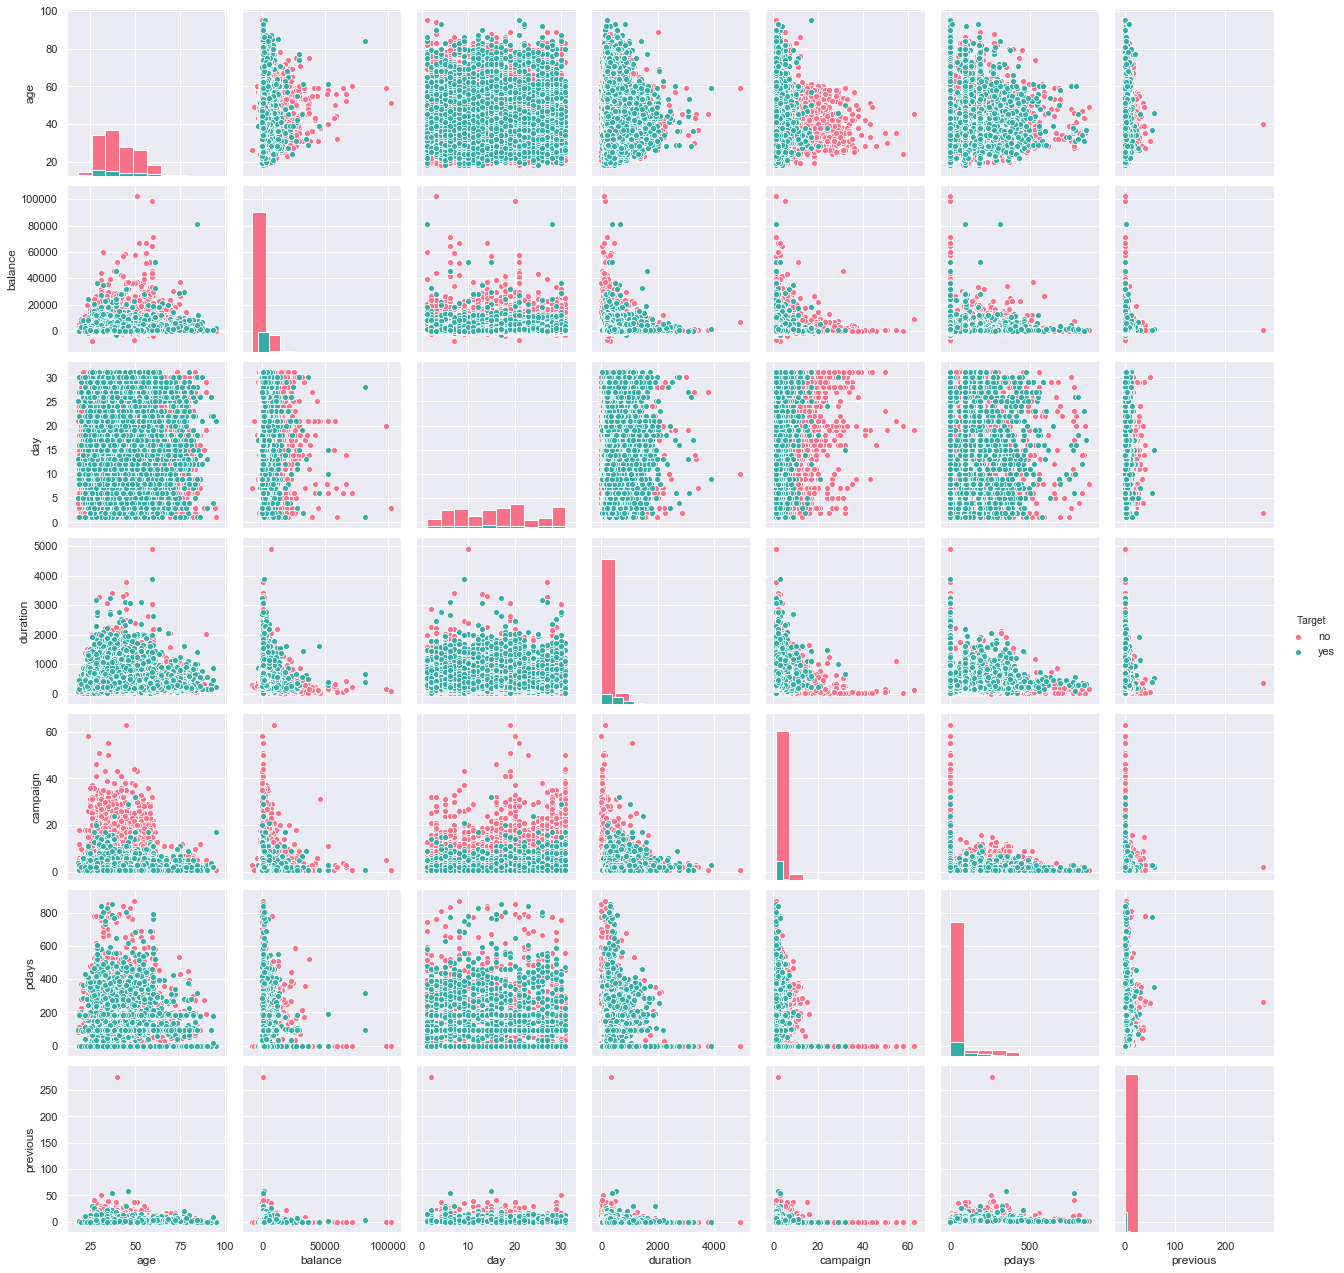

In [11]:
sns.pairplot(df, hue="Target", palette="husl", diag_kind="hist")

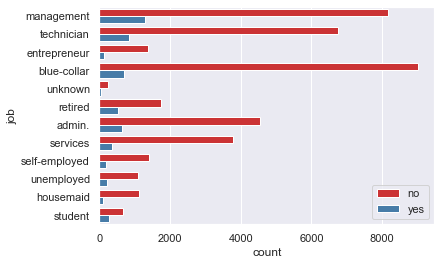

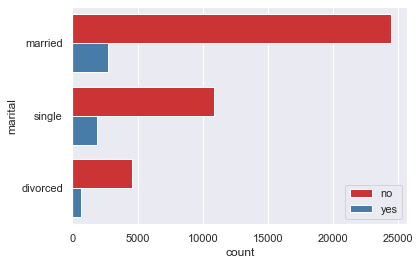

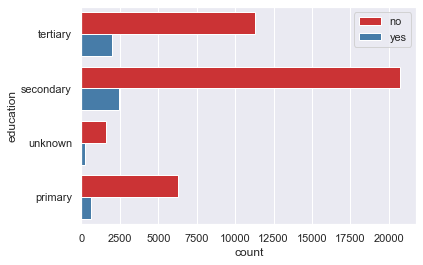

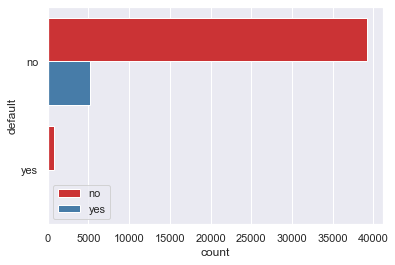

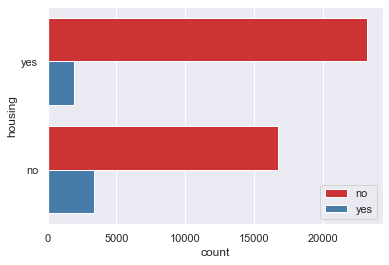

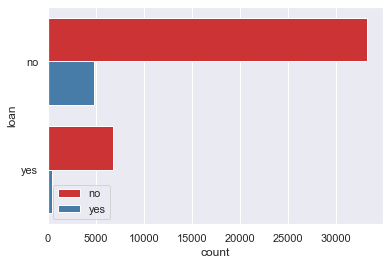

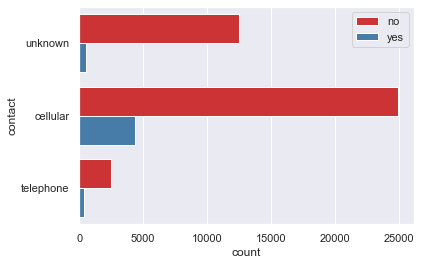

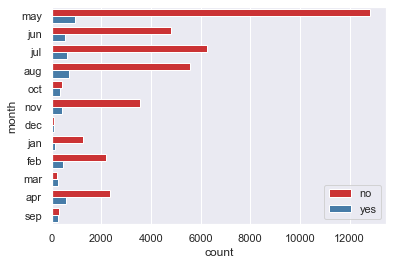

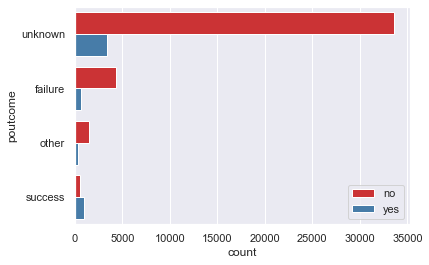

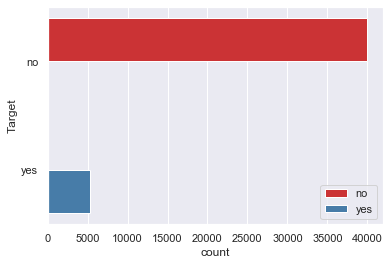

In [12]:
for c in df.columns[df.dtypes=='object']:
    sns.countplot(y=df[c], hue=df["Target"], palette="Set1")
    plt.legend()
    
    plt.show()

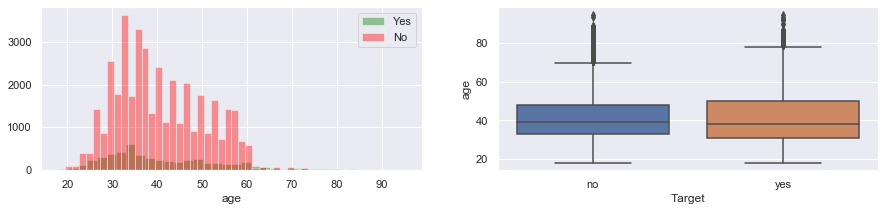

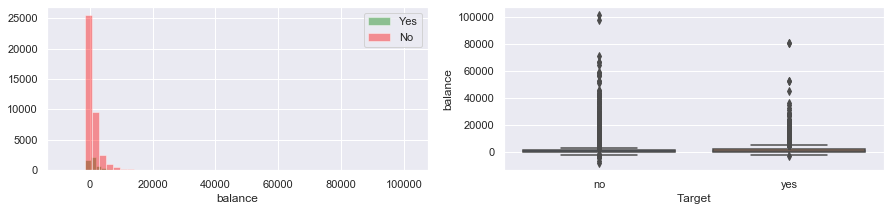

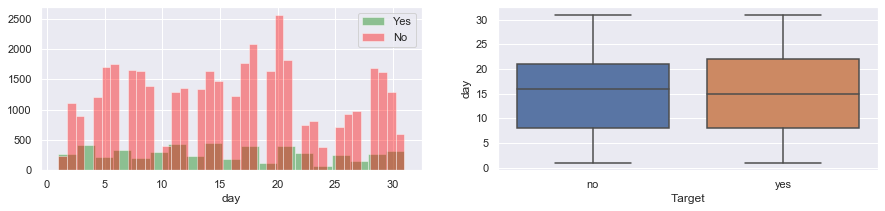

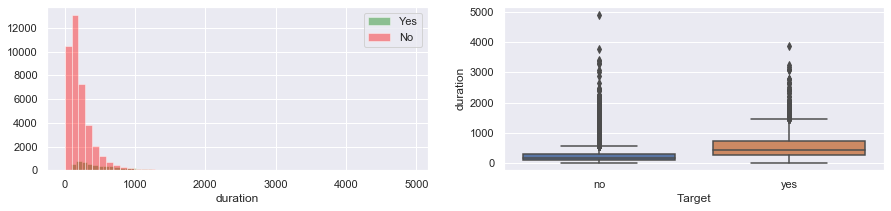

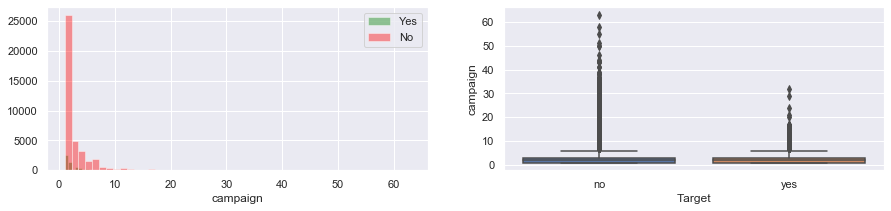

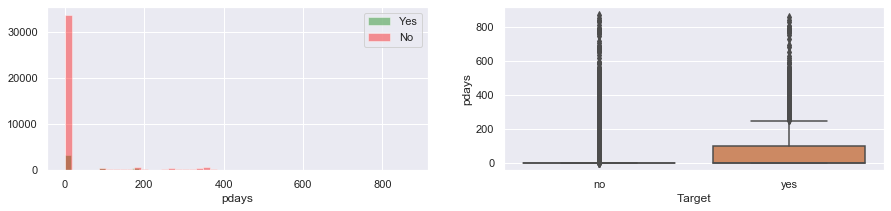

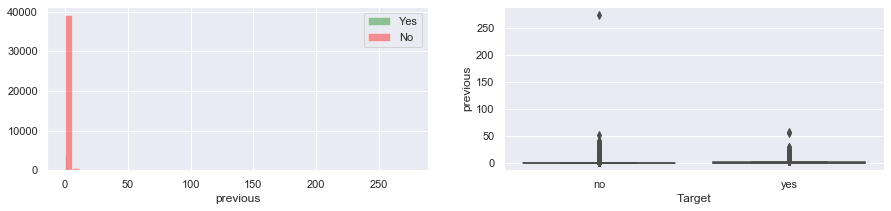

In [13]:
sns.set(font_scale=1) 
for c in df.columns[df.dtypes=='int64']:
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    sns.distplot(df[df['Target']=='yes'][c], kde=False, color='green', label='Yes')
    sns.distplot(df[df['Target']=='no'][c], kde=False, color='red', label='No')
    plt.legend()
    
    plt.subplot(1,2,2)
    sns.boxplot(df.Target, df[c])
    
    plt.show()

**Comments**

* No strong correlation could be observed between any two parameters from pairplots.
* The countplot of categorical variables are generated with "Target" as a hue.
* Histogram and boxplots are generated for continuous variables with "Target" as a hue.
* This exercise illustrates the relation of "Target" variable with the other variables.
* Due to highly bias nature of the data, the histogram or count of Target="No" is obsuring any possible pattern.
* Additionally, high count of 'unknown' in 'contact' and 'poutcome' need to be handled carefully.



## Problem Statement : Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

## Deliverable-2

* 'pdays' with -1 values were replaced with 900 as discussed earlier.
* 'unknown' are considered to be missing data
* 'unknown' values in 'job' & 'education' are replaced with the respective model value and checked by plottinng countplots.
* 'unknown' values in 'contact', 'poutcome' are too large. It will not be wise to replace them by modal values. They are replaced with other values in the same proportion as they appear in the data.
* After replaceing the 'unknown' values, dummy variables were created for all the categorical variables by one-hot-encoding.

In [14]:
df.pdays = df.pdays.replace({-1:900})

In [15]:
df.job=df.job.replace({"unknown":"blue-collar"})

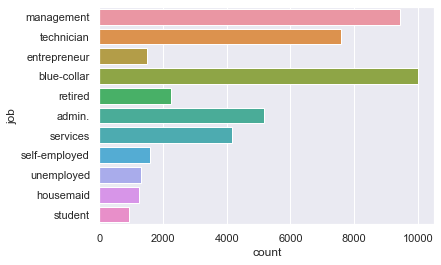

In [16]:
sns.countplot(y=df.job)

In [17]:
df.education=df.education.replace({"unknown":"secondary"})

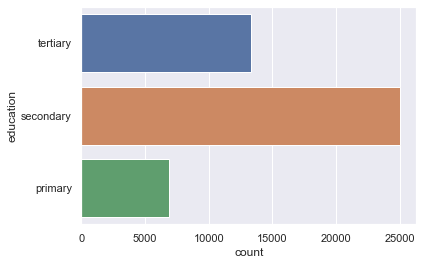

In [18]:
sns.countplot(y=df.education)

In [19]:
df[df.contact!='unknown'].contact.value_counts(normalize=True)

cellular    0.9097
telephone   0.0903
Name: contact, dtype: float64

In [20]:
proreplace = lambda x : np.random.choice(['cellular', 'telephone'],p=[0.9097, 0.0903]) if "unknown" else x
df.contact = df.contact.apply(proreplace);

In [21]:
df.contact.value_counts(normalize=True)

cellular    0.9116
telephone   0.0884
Name: contact, dtype: float64

In [22]:
df[df.poutcome!='unknown'].poutcome.value_counts(normalize=True)

failure   0.5939
other     0.2230
success   0.1831
Name: poutcome, dtype: float64

In [23]:
proreplace2 = lambda x : np.random.choice(['failure', 'other','success'],p=[0.5939, 0.2230, 0.1831]) if "unknown" else x
df.poutcome = df.poutcome.apply(proreplace2);

In [24]:
df.poutcome.value_counts(normalize=True)

failure   0.5940
other     0.2235
success   0.1825
Name: poutcome, dtype: float64

In [25]:
listoutvalues()

COLUMN:  job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64
------------------------------

COLUMN:  marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------

COLUMN:  education
secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64
------------------------------

COLUMN:  default
no     44396
yes      815
Name: default, dtype: int64
------------------------------

COLUMN:  housing
yes    25130
no     20081
Name: housing, dtype: int64
------------------------------

COLUMN:  loan
no     37967
yes     7244
Name: loan, dtype: int64
------------------------------

COLUMN:  contact
cellular     41215
telephone     3996
Name: contact, dtype: int64
-----------------------

* No more 'unknown' values. 

In [26]:
dummy_df=pd.get_dummies(df,drop_first=True)

In [27]:
dummy_df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Target_yes
0,58,2143,5,261,1,900,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,29,5,151,1,900,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,33,2,5,76,1,900,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,47,1506,5,92,1,900,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,33,1,5,198,1,900,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,900,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
45207,71,1729,17,456,2,900,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45209,57,668,17,508,4,900,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
from sklearn.model_selection import train_test_split
X = dummy_df.drop('Target_yes',axis=1)
y = dummy_df['Target_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Problem Statement : Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the
model performance by using different matrices. Use confusion matrix to evaluate
class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the
model. (10 marks)

2. Build the ensemble models (Bagging and Boosting) and note the model performance
by using different matrices. Use same metrics as in above model. (at least 3
algorithms) (15 marks)

## Deliverable - 3

In [29]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


def ModelEvaluation(mname, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_predict =model.predict(X_test)  
    
    #Confusion Matrix
    cm = confusion_matrix(y_test,y_predict,labels=[1,0])
  
    df_cm = pd.DataFrame(cm, index = ["True 1","True 0"],
                  columns = ["Predict 1","Predict 0"])
 
    #Scores
    score_in=model.score(X_train, y_train)
    score_out=model.score(X_test, y_test)
    
    recall= recall_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    errorrate = 1 - accuracy
    f1score = f1_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test,y_predict)
    
    
    return_dict = {"model":mname, "in_sample_score": score_in, "out_of_sample_score": score_out, "recall": recall, \
                   "precision": precision, "accuracy": accuracy, "error rate": errorrate, "f1score": f1score, \
                   "roc_auc": roc_auc}
    
    printmd("## Evaluation Scores of {} ".format(mname))
    print("In Sample Score\t\t: {:.5f}".format(score_in))
    print("Out Of Sample Score\t: {:.5f}".format(score_out))
    
    print("Recall Score \t\t: {:.5f}".format(recall))
    print("Precision Score \t: {:.5f}".format(precision))

    print("F1 Score\t\t: {:.5f}".format(f1score))
    print("Accuracy\t\t: {:.5f}".format(accuracy))
    print("Error Rate\t\t: {:.5f}".format(errorrate))
    print("Roc Auc Score\t\t: {:.5f}".format(roc_auc))
    
    #ROC Data
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
   
    #Plotting
    plt.figure(figsize = (18,7))
    plt.suptitle(mname)
    plt.subplot(1,2,1)
    sns.set(font_scale=1.8)
    sns.heatmap(df_cm,annot=True,fmt='0000',cmap='plasma');
    plt.title('Confusion Matrix')
   
    plt.subplot(1,2,2)
    plt.plot(fpr, tpr, label='Area = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    return(return_dict)

## Evaluation Scores of Logistic Regression 

In Sample Score		: 0.89456
Out Of Sample Score	: 0.89273
Recall Score 		: 0.25990
Precision Score 	: 0.57895
F1 Score		: 0.35875
Accuracy		: 0.89273
Error Rate		: 0.10727
Roc Auc Score		: 0.61761


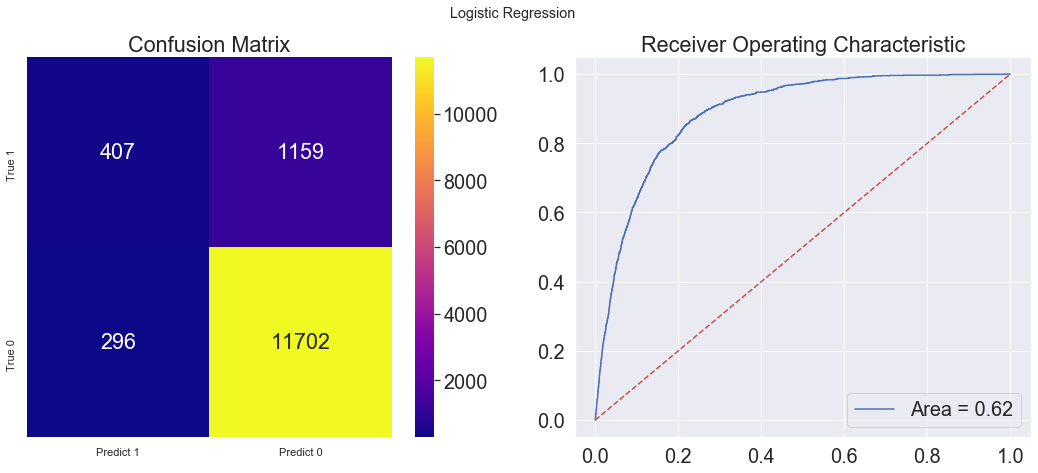

In [30]:
df_result = pd.DataFrame(columns=['model', 'in_sample_score', 'out_of_sample_score', 'recall', 'precision', 'accuracy' \
                                         , 'error rate', 'f1score', 'roc_auc'])


from sklearn.linear_model import LogisticRegression
m_logr = LogisticRegression(solver="liblinear")
result = ModelEvaluation("Logistic Regression", m_logr,X_train, y_train, X_test, y_test)
df_result = df_result.append(result, ignore_index=True)

## Evaluation Scores of Decision Tree Classifier 

In Sample Score		: 1.00000
Out Of Sample Score	: 0.86995
Recall Score 		: 0.44381
Precision Score 	: 0.43766
F1 Score		: 0.44071
Accuracy		: 0.86995
Error Rate		: 0.13005
Roc Auc Score		: 0.68469


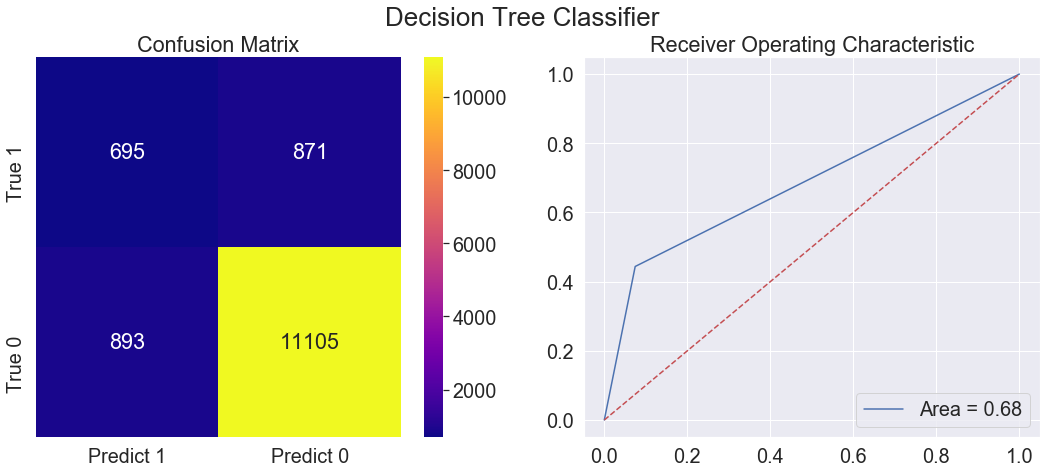

In [31]:
from sklearn.tree import DecisionTreeClassifier
m_dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=123)
result = ModelEvaluation("Decision Tree Classifier",m_dTree,X_train, y_train, X_test, y_test)
df_result = df_result.append(result, ignore_index=True)

## Reduced Decision Tree

## Evaluation Scores of Decision Tree Classifier (Reduced) 

In Sample Score		: 0.89023
Out Of Sample Score	: 0.89015
Recall Score 		: 0.22733
Precision Score 	: 0.55975
F1 Score		: 0.32334
Accuracy		: 0.89015
Error Rate		: 0.10985
Roc Auc Score		: 0.60200


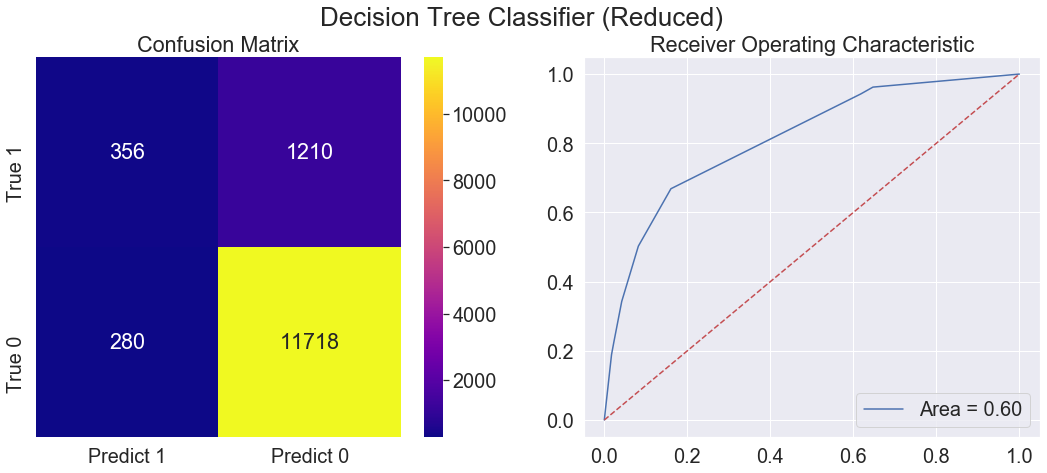

In [32]:
m_dTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=123)
result = ModelEvaluation("Decision Tree Classifier (Reduced)",m_dTreeR,X_train, y_train, X_test, y_test)
df_result = df_result.append(result, ignore_index=True)

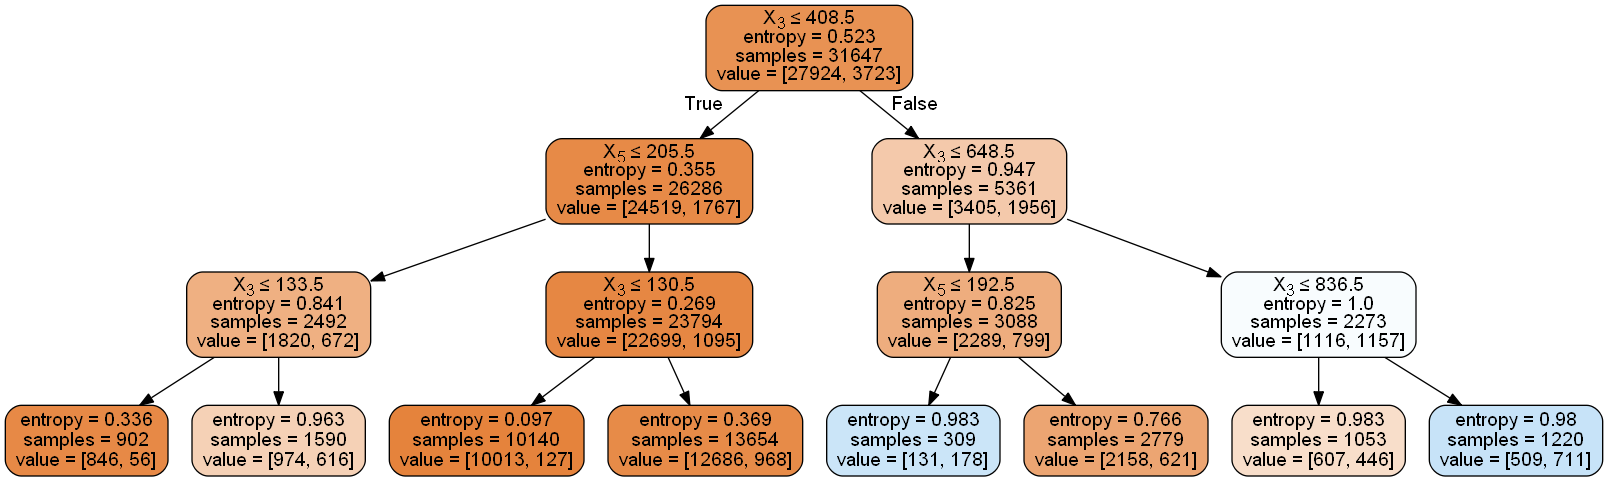

In [33]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(m_dTreeR, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dTreeR.png')
Image(graph.create_png())

## Evaluation Scores of Bagging Classifier 

In Sample Score		: 0.99981
Out Of Sample Score	: 0.89649
Recall Score 		: 0.39400
Precision Score 	: 0.57556
F1 Score		: 0.46778
Accuracy		: 0.89649
Error Rate		: 0.10351
Roc Auc Score		: 0.67804


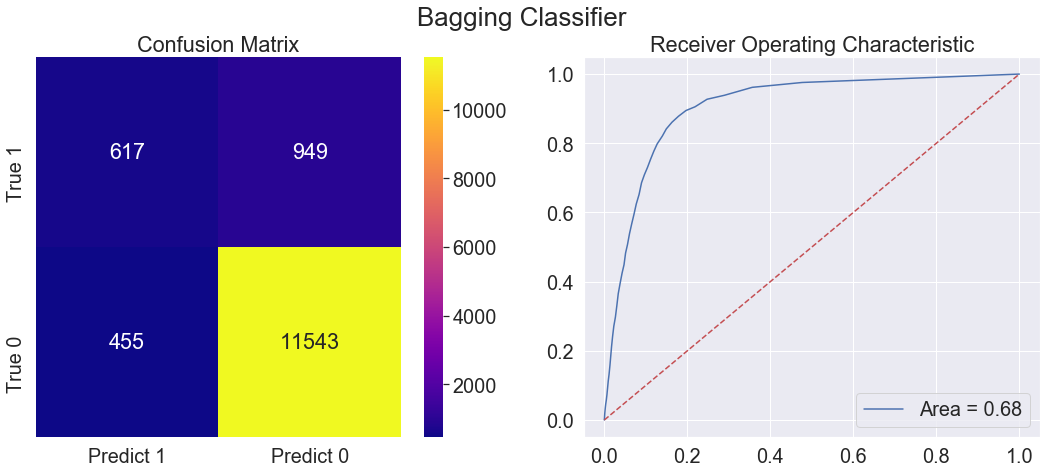

In [34]:
from sklearn.ensemble import BaggingClassifier
m_bagc = BaggingClassifier(base_estimator=m_dTree, n_estimators=50,random_state=1)
result = ModelEvaluation("Bagging Classifier",m_bagc,X_train, y_train, X_test, y_test)
df_result = df_result.append(result, ignore_index=True)

## Evaluation Scores of AdaBoost Classifier 

In Sample Score		: 0.89528
Out Of Sample Score	: 0.89443
Recall Score 		: 0.30779
Precision Score 	: 0.58072
F1 Score		: 0.40234
Accuracy		: 0.89443
Error Rate		: 0.10557
Roc Auc Score		: 0.63939


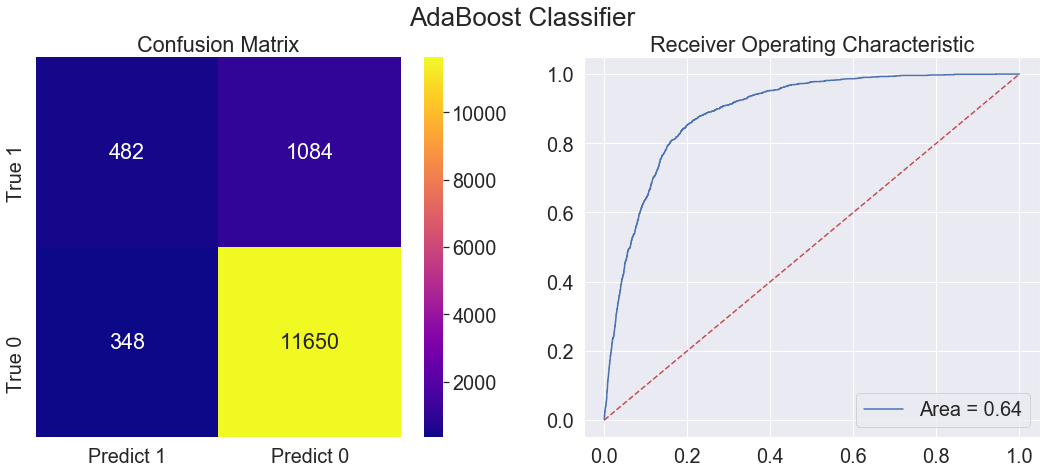

In [35]:
from sklearn.ensemble import AdaBoostClassifier
m_adab = AdaBoostClassifier(n_estimators=50, random_state=1)
result = ModelEvaluation("AdaBoost Classifier",m_adab,X_train, y_train, X_test, y_test)
df_result = df_result.append(result, ignore_index=True)

## Evaluation Scores of Gradient Boosting Classifier 

In Sample Score		: 0.90125
Out Of Sample Score	: 0.89693
Recall Score 		: 0.33078
Precision Score 	: 0.59677
F1 Score		: 0.42564
Accuracy		: 0.89693
Error Rate		: 0.10307
Roc Auc Score		: 0.65080


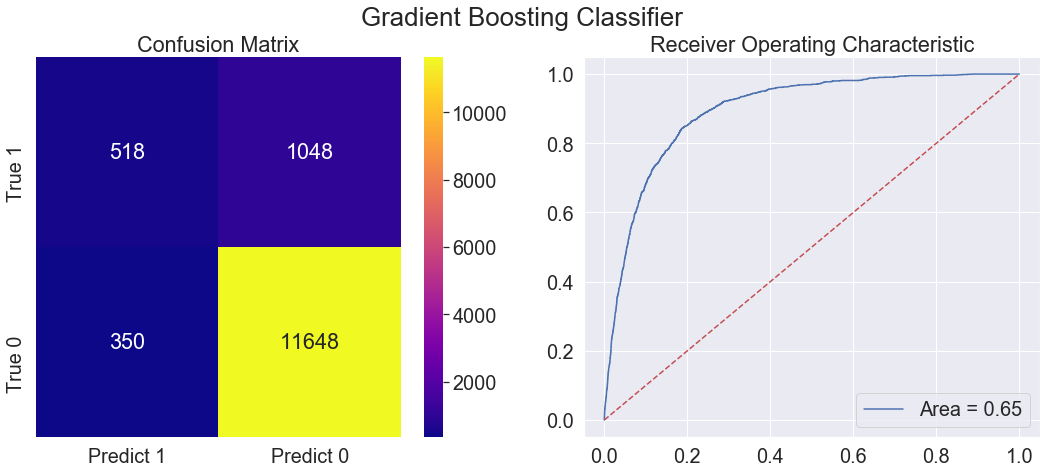

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
m_grdb = GradientBoostingClassifier(n_estimators = 50,random_state=1)
result = ModelEvaluation("Gradient Boosting Classifier",m_grdb,X_train, y_train, X_test, y_test)
df_result = df_result.append(result, ignore_index=True)

## Evaluation Scores of Random Forest Classifier 

In Sample Score		: 0.99984
Out Of Sample Score	: 0.89841
Recall Score 		: 0.35951
Precision Score 	: 0.60021
F1 Score		: 0.44968
Accuracy		: 0.89841
Error Rate		: 0.10159
Roc Auc Score		: 0.66413


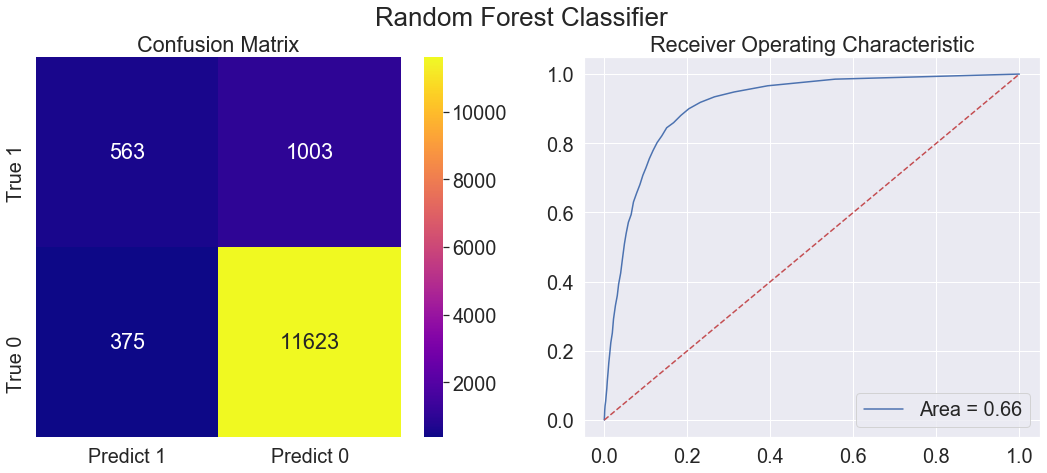

In [37]:
from sklearn.ensemble import RandomForestClassifier
m_rf = RandomForestClassifier(n_estimators = 50, random_state=123, max_features=8)
result = ModelEvaluation("Random Forest Classifier",m_rf,X_train, y_train, X_test, y_test)
df_result = df_result.append(result, ignore_index=True)

## Summary Result

In [38]:
df_result

,model,in_sample_score,out_of_sample_score,recall,precision,accuracy,error rate,f1score,roc_auc
0,Logistic Regression,0.8946,0.8927,0.2599,0.5789,0.8927,0.1073,0.3587,0.6176
1,Decision Tree Classifier,1.0000,0.8699,0.4438,0.4377,0.8699,0.1301,0.4407,0.6847
2,Decision Tree Classifier (Reduced),0.8902,0.8902,0.2273,0.5597,0.8902,0.1098,0.3233,0.6020
3,Bagging Classifier,0.9998,0.8965,0.3940,0.5756,0.8965,0.1035,0.4678,0.6780
4,AdaBoost Classifier,0.8953,0.8944,0.3078,0.5807,0.8944,0.1056,0.4023,0.6394
5,Gradient Boosting Classifier,0.9013,0.8969,0.3308,0.5968,0.8969,0.1031,0.4256,0.6508
6,Random Forest Classifier,0.9998,0.8984,0.3595,0.6002,0.8984,0.1016,0.4497,0.6641


* Various models were used to predict potential customers who would opt for Term Deposit from the bank.
* Various scores of the models listed out.
* A maximum ROC_AUC score of 0.6847 could be achieved. The models has poor recall rate (0.2273 - 0.4438) and moderate precision (0.4377-0.6002).